First of all, let us start by importing the necessory packages.

In [356]:
import pandas as pd
import numpy as np

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [358]:
sns.set_style('whitegrid')

In [359]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## **Logistic Regression**

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.

p = e^y/ 1 + e^y

Let us first retrieve the dataset from the statsmodels

In [360]:
import statsmodels.api as sm

In [361]:
df = sm.datasets.fair.load_pandas().data

In [362]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## **Data Visualization**

In [363]:
# let us see the details of this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


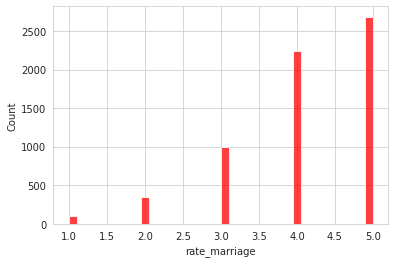

In [364]:
# Let us see the distribution of marriage type throughout the dataset
sns.histplot(data=df, x='rate_marriage', color='red')

Most of the couples had very good marriage life

Now let us make the affair column such a way that it is binomial

In [365]:
def change_affair_value(val):
  if val == 0:
    return 0
  else:
    return 1

In [366]:
df['affairs'] = df['affairs'].apply(change_affair_value)

In [367]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [368]:
df.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,0.017637
affairs,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,1.000000


Now let  us see the rate of couples that had affairs and that hadn't and compare it with rate of marriage.

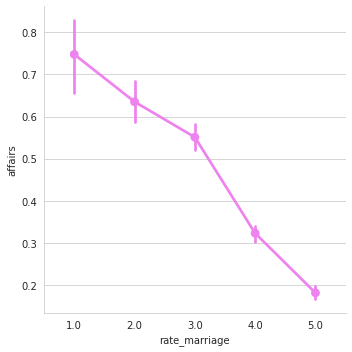

In [369]:
sns.catplot(data=df, x='rate_marriage', kind='point', y='affairs', color='violet', legend=False)
plt.show()

Marriage that rates 3 and below had higher rates of affairs.

Now let us see the same for number of years after marriage

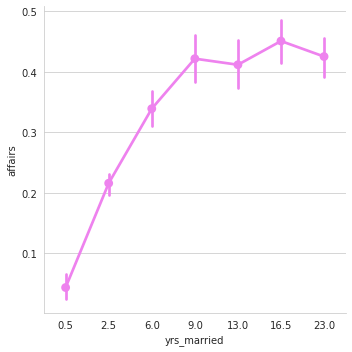

In [370]:
sns.catplot(data=df, x='yrs_married', y='affairs', color='violet', kind='point')
plt.show()

It can be viewed that with increasing number of years married, the rate of affairs increase.

Number of children, age, and religion are the other factors that had higher correlation with the affair rate.

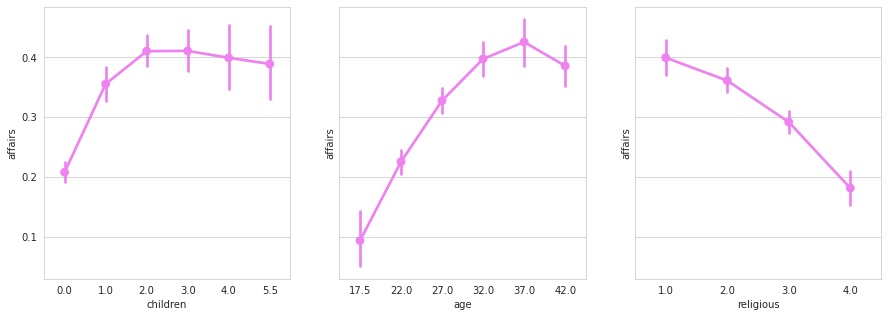

In [371]:
fig, axis = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
sns.pointplot(data=df, x='children', y='affairs', color='violet', ax=axis[0])
sns.pointplot(data=df, x='age', y='affairs', color='violet', ax=axis[1])
sns.pointplot(data=df, x='religious', y='affairs', color='violet', ax=axis[2])
plt.show()

All these features seem to show the character of a logistic regression graph. Higher the age and the number of children, more likely to have affairs. But there is a slight depth after some time. 

Affairs are less in case of religious couples.

Out of curiosity, let us check how the rate of marriage changes with age.

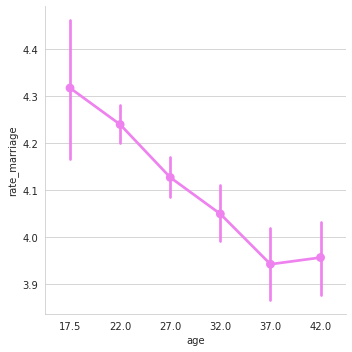

In [372]:
sns.catplot(data=df, x='age', y='rate_marriage', color='violet', kind='point')
plt.show()

The rate of marriage is declining by age as shown in the graph.

For curiosity, let us also see the relationship between education and occupation.

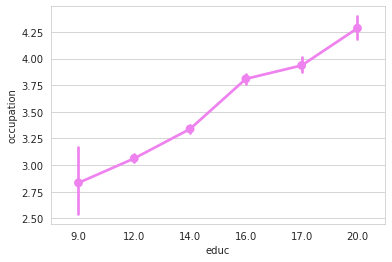

In [373]:
sns.pointplot(data=df, x='educ', y='occupation', color='violet')

This is obvious.

Occupation, Education, and occupation of husband are features that has shown less correlation here. Let us visualize them.

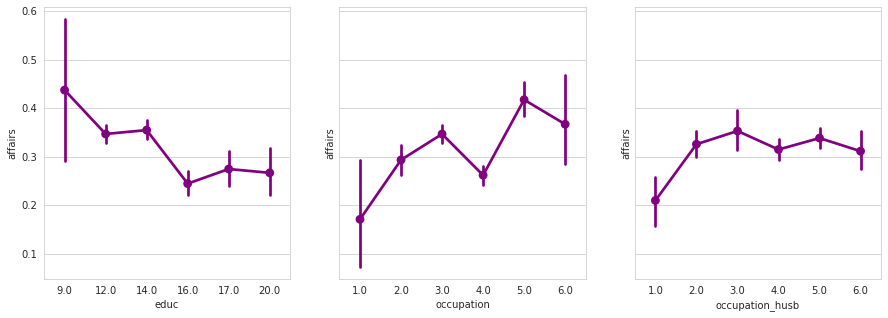

In [374]:
fig, axis = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
sns.pointplot(data=df, x='educ', y='affairs', color='purple', ax=axis[0])
sns.pointplot(data=df, x='occupation', y='affairs', color='purple', ax=axis[1])
sns.pointplot(data=df, x='occupation_husb', y='affairs', ax=axis[2], color='purple')
plt.show()

Even though correlation value was less. They really have influence over the rate of affairs. It can be observed from the graph that couples with least education and good occupation are more likely to have affairs.

All of these data visualizations has helped us understand that a logistic regression model would be apt for the dataset we are dealing with.

## **Logistic Regression**

Before going ahead with this, there is a need to make dummy columns. This is because most of the features are identified on the basis of numeric values. This might confuse the regression model as it might valuate the values with greater magnitude with the same value.

### Train Test Split

In [375]:
# Defining the input and output
X = df.drop(['affairs'], axis=1)
Y = df['affairs'].values

In [376]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=687)

### **Data Preperation**

children, religious, occupation, occupation_husb and rate_marriage are categorical features and needs to be dummied.

In [377]:
X_train_withDummy =  X_train.astype({'children': 'category', 'religious': 'category', 'occupation': 'category', 'occupation_husb': 'category', 'rate_marriage': 'category' })
X_train_withDummy = pd.get_dummies(X_train_withDummy, drop_first=True)
X_train_withDummy.head()

,age,yrs_married,educ,rate_marriage_2.0,rate_marriage_3.0,rate_marriage_4.0,rate_marriage_5.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5,religious_2.0,religious_3.0,religious_4.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
2313,27.0,13.0,16.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2469,27.0,9.0,12.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3057,22.0,2.5,16.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
6300,27.0,13.0,12.0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1778,27.0,6.0,12.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


We are dropping first dummy column to reduce multi collinearity between the features.

## **Modeling**

In [378]:
lr = LogisticRegression(max_iter=1000, random_state=687)

### **Without Dummies**

In [379]:
# Fitting the model
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=687)

In [380]:
# prediction
pred = lr.predict(X_test)

In [381]:
# accuracy score
accuracy_score(pred, Y_test)

0.7192224622030238

### **With Dummies**

In [382]:
lr_withDummy = LogisticRegression(max_iter=1000, random_state=687)

In [383]:
# Fitting the model
lr_withDummy.fit(X_train_withDummy, Y_train)

LogisticRegression(max_iter=1000, random_state=687)

In [384]:
X_test_withDummy =  X_test.astype({'children': 'category', 'religious': 'category', 'occupation': 'category', 'occupation_husb': 'category', 'rate_marriage': 'category' })
X_test_withDummy = pd.get_dummies(X_test_withDummy, drop_first=True)

In [385]:
# prediction
pred_withDummy = lr_withDummy.predict(X_test_withDummy)

In [386]:
# accuracy score
accuracy_score(pred_withDummy, Y_test)

0.721578637345376

Difference between doing by using dummies and not doing dummies is 0.20%.

Let us visualize the coefficients now

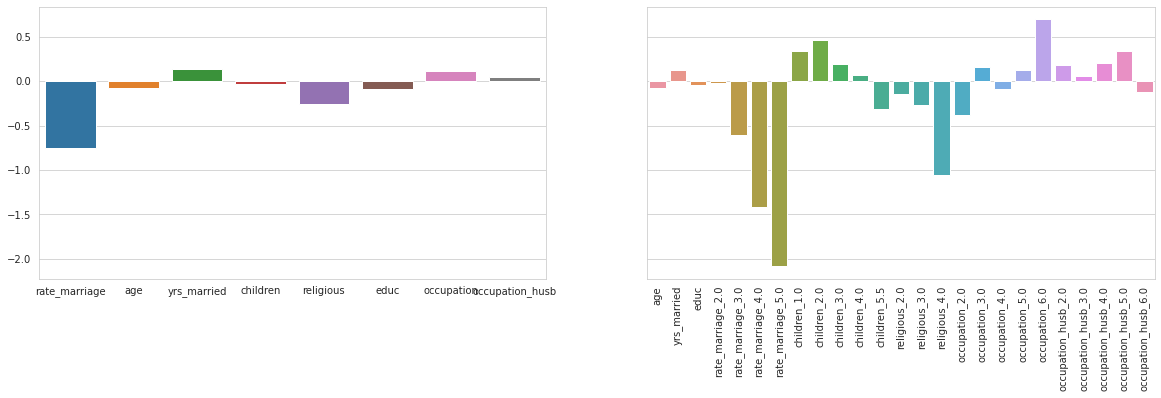

In [387]:
fig, axis = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
sns.barplot(x=X_train.columns, y=lr.coef_.reshape(8), ax=axis[0])
sns.barplot(x=X_train_withDummy.columns, y=lr_withDummy.coef_.reshape(25), ax=axis[1])
plt.xticks(rotation=90)
plt.show()

Here we could see for both the models, occupation which didn't follow a proper linear relationship with the rate of affairs is given more priority over age ad years married. Solving this might improve the accuracy.

### **Removing the occupation and occupation_husb and then trying**

In [388]:
lr_1 = LogisticRegression(max_iter=1000, random_state=687)

In [389]:
# Fitting the model
lr_1.fit(X_train.drop(['occupation', 'occupation_husb'], axis=1), Y_train)

LogisticRegression(max_iter=1000, random_state=687)

In [390]:
# prediction
pred_1 = lr_1.predict(X_test.drop(['occupation', 'occupation_husb'], axis=1))

In [391]:
# accuracy score
accuracy_score(pred_1, Y_test)

0.7168662870606715

This really didn't help. This gives us the idea that the coefficients are assigned not on the basis of other features. It is truly independent. Removing one feature won't help in changing the coefficients of other features. It would only reduce the complexity of the model if the prediction is as accurate as before which is not true here.

### **Regularization**

*regularization can be used to train models that generalize better on unseen data, by preventing the algorithm from overfitting the training dataset.*

*But why should we penalize high coefficients? If a feature occurs only in one class it will be assigned a very high coefficient by the logistic regression algorithm. In this case the model will learn all details about the training set, probably too perfectly.*

---

Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting. 

The commonly used regularization techniques are : 
*   L1 regularization
*   L2 regularization
*   Dropout regularization

A regression model which uses L1 Regularization technique is called LASSO(Least Absolute Shrinkage and Selection Operator) regression. 

A regression model that uses L2 regularization technique is called Ridge regression. 

Lasso Regression adds “absolute value of magnitude” of coefficient as penalty term to the loss function(L). 

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function(L).

In [392]:
from sklearn.linear_model import Ridge

In [393]:
# Creating the model
ridge = Ridge(alpha=0.71, random_state=687)
ridge.fit(X_train_withDummy, Y_train)

Ridge(alpha=0.71, random_state=687)

In [394]:
# Predicting the values
ridge_prediction = ridge.predict(X_test_withDummy)

In [395]:
# Checking the accuracy
accuracy_score(np.round(ridge_prediction), Y_test)

0.7239348124877283

Adding regularization has only helped in impoving the accuracy by 0.20%

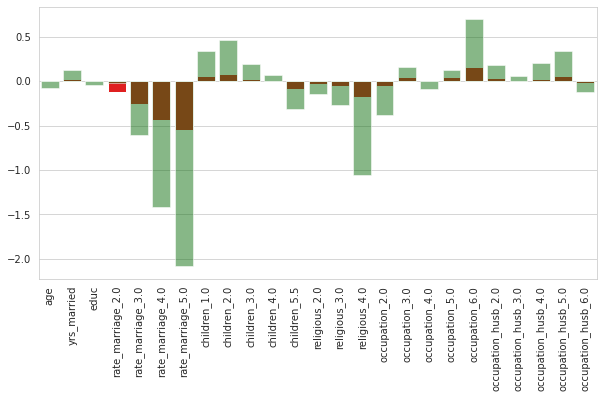

In [396]:
plt.subplots(figsize=(10, 5))
sns.barplot(x=X_train_withDummy.columns, y=ridge.coef_.reshape(25), alpha=1, color='red')
sns.barplot(x=X_train_withDummy.columns, y=lr_withDummy.coef_.reshape(25), alpha=0.5, color='green')
plt.xticks(rotation=90)
plt.show()

Clearly evident that the coefficient values have reduced. For some of them they have grown from negative to positive value.